In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

/home/roman/my_env/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train = pd.read_csv('/home/roman/Projects/Study_projects/Kaggle/House_Prices/house-prices-advanced-regression-techniques/train.csv', index_col=0)
test = pd.read_csv('/home/roman/Projects/Study_projects/Kaggle/House_Prices/house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [3]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# EDA

In [5]:
train.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

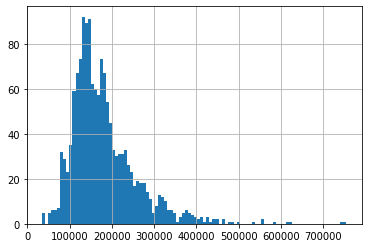

In [7]:
train['SalePrice'].hist(bins=100)

In [8]:
corrmat = train.corr()

In [9]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


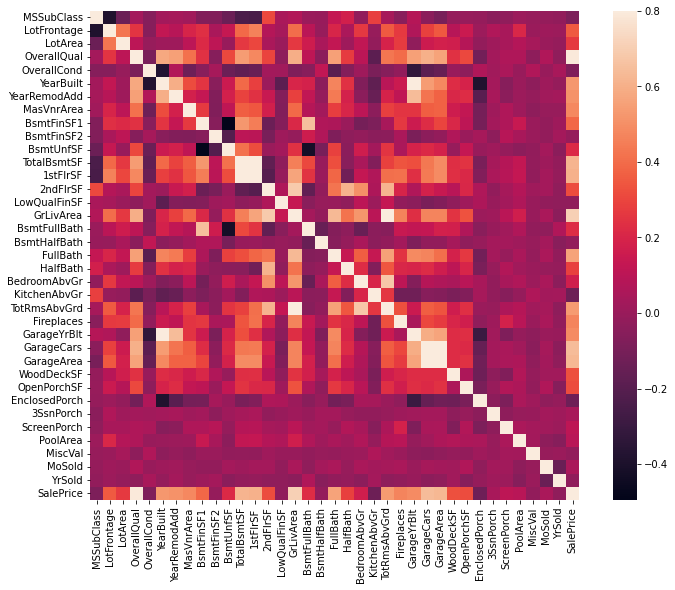

In [10]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
cols = corrmat.nlargest(10, 'SalePrice').index

In [12]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

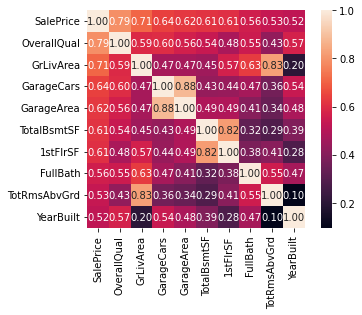

In [13]:
hm = sns.heatmap(train[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/home/roman/my_env/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


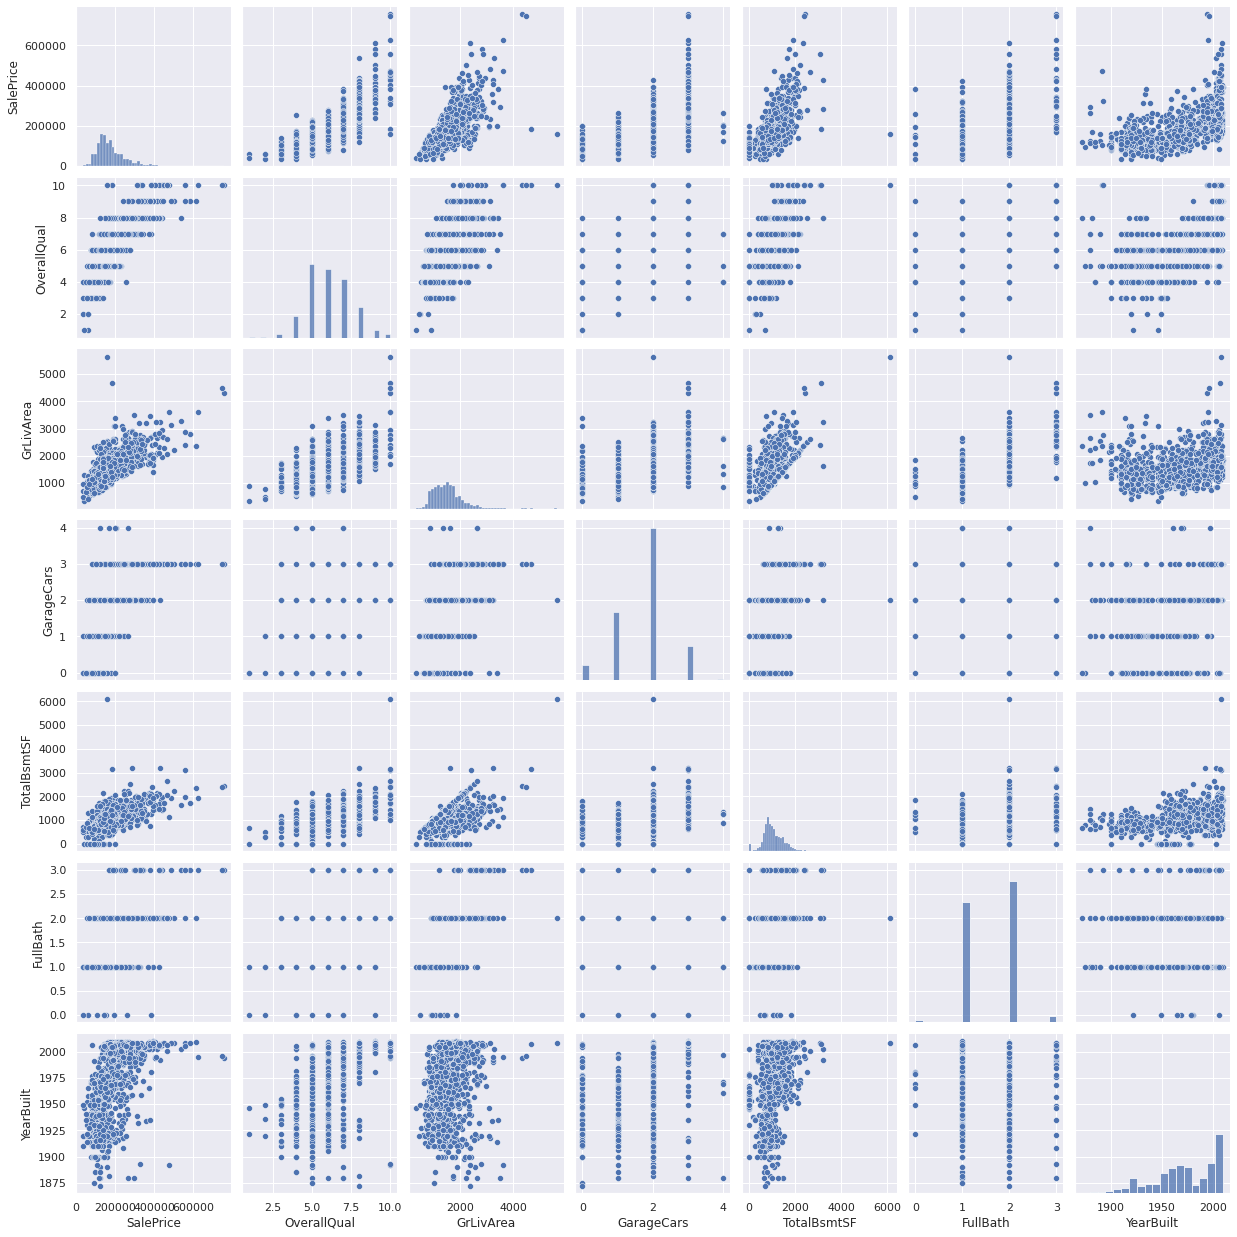

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Missing values

In [15]:
(train.isna().mean())[train.isna().mean() != 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [16]:
train.groupby('PoolQC', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
PoolQC,,
Ex,2,490000.000000
Fa,2,215500.000000
Gd,3,201990.000000
NaN,1453,180404.663455


In [17]:
train.groupby('MiscFeature', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
MiscFeature,,
Gar2,2,170750.000000
Othr,2,94000.000000
Shed,49,151187.612245
TenC,1,250000.000000
NaN,1406,182046.410384


In [18]:
train.groupby('Alley', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
Alley,,
Grvl,50,122219.080000
Pave,41,168000.585366
NaN,1369,183452.131483


In [19]:
train.groupby('Fence', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
Fence,,
GdPrv,59,178927.457627
GdWo,54,140379.314815
MnPrv,157,148751.089172
MnWw,11,134286.363636
NaN,1179,187596.837998


In [20]:
train.groupby('FireplaceQu', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
FireplaceQu,,
Ex,24,337712.500000
Fa,33,167298.484848
Gd,380,226351.415789
Po,20,129764.150000
TA,313,205723.488818
NaN,690,141331.482609


In [21]:
na_cols_to_drop = (train.isna().mean())[train.isna().mean() > 0.2].sort_values(ascending=False).index.tolist()

In [22]:
na_cols_to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [23]:
train.drop(na_cols_to_drop, axis=1, inplace=True)
test.drop(na_cols_to_drop, axis=1, inplace=True)

In [24]:
(train.isna().mean())[train.isna().mean() != 0].sort_values(ascending=False)

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [25]:
train[['Neighborhood', 'LotFrontage']].sort_values(by='Neighborhood').head(50)

,Neighborhood,LotFrontage
Id,,
852,Blmngtn,NaN
466,Blmngtn,NaN
791,Blmngtn,43.0
1020,Blmngtn,43.0
640,Blmngtn,53.0
1127,Blmngtn,53.0
598,Blmngtn,53.0
220,Blmngtn,43.0
1005,Blmngtn,43.0


In [26]:
nan_LotFrontage_dict = train.groupby("Neighborhood")["LotFrontage"].agg(['mean']).to_dict()['mean']

In [27]:
nan_LotFrontage_dict

{'Blmngtn': 47.142857142857146,
 'Blueste': 24.0,
 'BrDale': 21.5625,
 'BrkSide': 57.509803921568626,
 'ClearCr': 83.46153846153847,
 'CollgCr': 71.68253968253968,
 'Crawfor': 71.8048780487805,
 'Edwards': 68.21739130434783,
 'Gilbert': 79.87755102040816,
 'IDOTRR': 62.5,
 'MeadowV': 27.8,
 'Mitchel': 70.08333333333333,
 'NAmes': 76.46236559139786,
 'NPkVill': 32.285714285714285,
 'NWAmes': 81.28888888888889,
 'NoRidge': 91.87878787878788,
 'NridgHt': 81.88157894736842,
 'OldTown': 62.788990825688074,
 'SWISU': 58.91304347826087,
 'Sawyer': 74.4375,
 'SawyerW': 71.5,
 'Somerst': 64.66666666666667,
 'StoneBr': 62.7,
 'Timber': 80.13333333333334,
 'Veenker': 59.714285714285715}

In [28]:
aaa = train['LotFrontage']
aaa.index = train['Neighborhood']
aaa.fillna(nan_LotFrontage_dict, inplace=True)

train["LotFrontage"] = aaa.values

In [29]:
bbb = test['LotFrontage']
bbb.index = test['Neighborhood']
bbb.fillna(nan_LotFrontage_dict, inplace=True)

test["LotFrontage"] = bbb.values

In [30]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

train["Functional"] = train["Functional"].fillna("Typ")

train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")
train = train.drop(['Utilities'], axis=1)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [31]:
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')

test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])

test["Functional"] = test["Functional"].fillna("Typ")

test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])
test['MSSubClass'] = test['MSSubClass'].fillna("None")
test = test.drop(['Utilities'], axis=1)
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])

In [33]:
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [34]:
test.isna().sum().sum()

0

In [35]:
(test.isna().sum())[test.isna().sum() != 0]

Series([], dtype: int64)

In [36]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [37]:
#MSSubClass=The building class
test['MSSubClass'] = test['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
test['OverallCond'] = test['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [38]:
obj_col = train.columns[(train.dtypes == 'object')].tolist()

In [39]:
obj_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [40]:
train.groupby('MSSubClass')['SalePrice'].agg(['count', 'mean'])

,count,mean
MSSubClass,,
120,87,200779.080460
160,63,138647.380952
180,10,102300.000000
190,30,129613.333333
20,536,185224.811567
30,69,95829.724638
40,4,156125.000000
45,12,108591.666667
50,144,143302.972222


<AxesSubplot:xlabel='MSSubClass'>

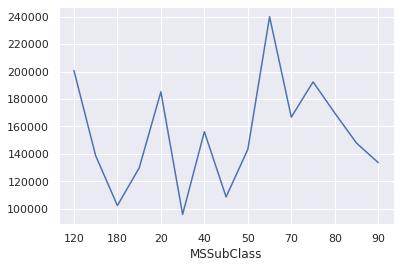

In [41]:
train.groupby('MSSubClass')['SalePrice'].mean().plot()

In [42]:
train.groupby('MSZoning')['SalePrice'].agg(['count', 'mean'])

,count,mean
MSZoning,,
C (all),10,74528.000000
FV,65,214014.061538
RH,16,131558.375000
RL,1151,191004.994787
RM,218,126316.830275


<AxesSubplot:xlabel='MSZoning'>

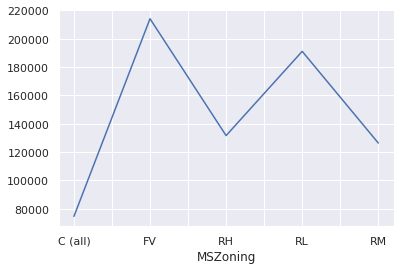

In [43]:
train.groupby('MSZoning')['SalePrice'].mean().plot()

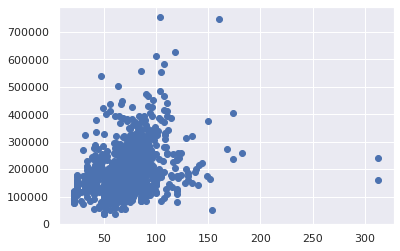

In [44]:
plt.scatter(train['LotFrontage'], train['SalePrice'])

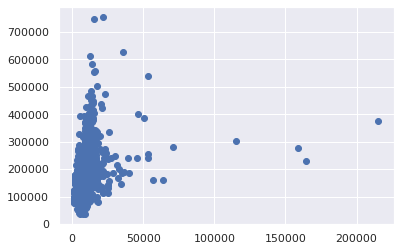

In [45]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [46]:
train.groupby('YearBuilt')['SalePrice'].agg(['count', 'mean'])

,count,mean
YearBuilt,,
1872,1,122000.000000
1875,1,94000.000000
1880,4,200619.750000
1882,1,168000.000000
1885,2,111250.000000
...,...,...
2006,67,251775.447761
2007,49,255362.734694
2008,23,348849.130435


<AxesSubplot:xlabel='YearBuilt'>

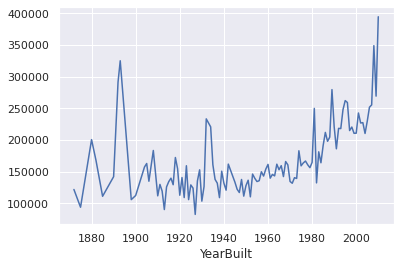

In [47]:
train.groupby('YearBuilt')['SalePrice'].mean().plot()

In [48]:
train.groupby('Street')['SalePrice'].agg(['count', 'mean'])

,count,mean
Street,,
Grvl,6,130190.500000
Pave,1454,181130.538514


In [49]:
train.groupby('LotShape')['SalePrice'].agg(['count', 'mean'])

,count,mean
LotShape,,
IR1,484,206101.665289
IR2,41,239833.365854
IR3,10,216036.500000
Reg,925,164754.818378


<AxesSubplot:xlabel='LotShape'>

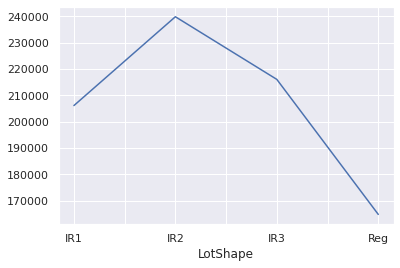

In [50]:
train.groupby('LotShape')['SalePrice'].mean().plot()

In [51]:
train.groupby('LandContour')['SalePrice'].agg(['count', 'mean'])

,count,mean
LandContour,,
Bnk,63,143104.079365
HLS,50,231533.940000
Low,36,203661.111111
Lvl,1311,180183.746758


<AxesSubplot:xlabel='LandContour'>

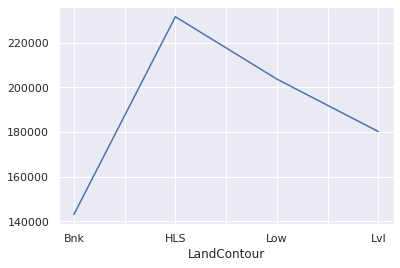

In [52]:
train.groupby('LandContour')['SalePrice'].mean().plot()

# One Hot Encoding

In [53]:
obj_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [54]:
y_trn = np.log(train[['SalePrice']])

In [55]:
y_trn

,SalePrice
Id,
1,12.247694
2,12.109011
3,12.317167
4,11.849398
5,12.429216
...,...
1456,12.072541
1457,12.254863
1458,12.493130


In [56]:
X_trn = train.drop('SalePrice', axis=1)

In [57]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_trn[obj_col]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[obj_col]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_trn.index
OH_cols_test.index = test.index

In [58]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_trn.drop(obj_col, axis=1)
num_X_test = test.drop(obj_col, axis=1)

In [59]:
(num_X_train < 0).sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

In [60]:
scaler = MinMaxScaler()
num_X_train_scaled = pd.DataFrame(scaler.fit_transform(num_X_train))
num_X_test_scaled = pd.DataFrame(scaler.transform(num_X_test))

num_X_train_scaled.index = num_X_train.index
num_X_test_scaled.index = num_X_test.index

In [61]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train_scaled, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test_scaled, OH_cols_test], axis=1)

In [62]:
OH_X_train

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,0.666667,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.202055,0.038795,0.555556,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.160959,0.046507,0.666667,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.133562,0.038561,0.666667,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.215753,0.060576,0.777778,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.140411,0.030929,0.555556,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.219178,0.055505,0.555556,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,0.252373,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.154110,0.036187,0.666667,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,0.188543,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
lr = LinearRegression()
lr.fit(OH_X_train, y_trn)

LinearRegression()

In [64]:
lr.coef_

array([[ 7.72324330e-02,  5.98258616e-01,  3.48364836e-01,
         2.40459824e-01,  5.49075865e-02,  3.23527858e-02,
         1.19800986e+09,  3.12875007e+08,  4.95845329e+08,
        -1.29692421e+09,  1.21599367e+09,  5.76187913e+08,
         1.59602657e+08, -1.48106801e+09,  6.64812306e-02,
         1.51173346e-02,  7.85447606e-02,  5.72082877e-02,
         3.59158552e-02, -1.78682058e-01,  1.90647525e-02,
         7.03316164e-02, -5.17726643e-01,  8.47917523e-02,
         1.76270798e-01,  8.25865395e-02,  3.29843666e-02,
         6.15283471e-02,  8.37476926e-02,  1.15207063e-01,
         1.18577138e-01,  2.36139844e-02,  2.88036923e+09,
         2.88036923e+09,  2.88036923e+09,  2.88036923e+09,
         2.88036923e+09,  2.88036923e+09,  2.88036923e+09,
         2.88036923e+09,  2.88036923e+09,  2.88036923e+09,
         2.88036923e+09,  2.88036923e+09,  2.88036923e+09,
         2.88036923e+09,  7.42079437e+08, -5.50088175e+09,
        -5.50088175e+09, -5.50088175e+09, -5.50088175e+0

In [65]:
lr.score(OH_X_train, y_trn)

0.9455879686174925

In [66]:
np.sqrt(-1 * cross_val_score(lr, OH_X_train, y_trn, cv=5, scoring='neg_mean_squared_error'))

array([4.13209808e+09, 5.49321811e+09, 6.99966575e+08, 3.18437668e+09,
       1.84922396e+09])

In [67]:
mean_squared_error(y_trn, lr.predict(OH_X_train))

0.00867613476901295

In [68]:
mean_squared_error(y_tst, lr.predict(OH_X_test))

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]

In [201]:
lasso = Lasso(alpha =0.00005, random_state=1)
lasso.fit(OH_X_train, y_trn)
np.sqrt(-1 * cross_val_score(lr, OH_X_train, y_trn, cv=3, scoring='neg_mean_squared_error'))

array([1.09071924e+09, 4.95121777e+08, 3.34015398e+09])

In [209]:
lasso.score(OH_X_train, y_trn)

0.944046953770628

In [210]:
lasso.coef_

array([ 7.39925695e-02,  4.25958135e-01,  3.81641779e-01,  1.97959444e-01,
        5.24357543e-02,  3.14009180e-02,  2.48800938e-01,  5.36354151e-02,
       -0.00000000e+00,  4.29787894e-01,  5.92872087e-02,  0.00000000e+00,
       -1.53264222e-04,  1.15295571e+00,  7.93149726e-02,  1.79810191e-02,
        8.07859296e-02,  5.62996161e-02,  3.06221886e-02, -1.29639106e-01,
        3.23603447e-02,  7.80243403e-02,  0.00000000e+00,  1.03842724e-01,
        1.46265295e-01,  8.04422660e-02,  3.87174428e-02,  4.94184160e-02,
        6.86276820e-02,  1.13591274e-01,  8.78697708e-02, -0.00000000e+00,
       -1.45871541e-02, -8.67393756e-02, -2.26986386e-02,  0.00000000e+00,
        2.32740235e-02, -3.94958115e-02,  0.00000000e+00, -1.71781273e-02,
        3.07408093e-02,  0.00000000e+00,  4.55470199e-02, -9.88593634e-03,
        0.00000000e+00,  9.21426087e-03,  0.00000000e+00, -4.35241685e-01,
        3.01528202e-02,  5.89663334e-03,  0.00000000e+00, -5.55359582e-02,
       -4.95004644e-02,  

In [213]:
idx = np.array(OH_X_train.columns)[lasso.coef_ != 0]
# array(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5'], dtype='<U3')

In [217]:
len(idx)

230

In [219]:
sel_cols = OH_X_train.columns[idx].tolist()

In [221]:
lr = LinearRegression()
lr.fit(OH_X_train[sel_cols], y_trn)
lr.score(OH_X_train[sel_cols], y_trn)

0.9240150597179725

In [222]:
np.sqrt(-1 * cross_val_score(lr, OH_X_train[sel_cols], y_trn, cv=5, scoring='neg_mean_squared_error'))

array([2.54267030e+09, 1.33679095e+09, 3.32883083e+08, 4.23725134e+09,
       7.97268247e+08])

In [71]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [72]:
np.sqrt(-1 * cross_val_score(GBoost, OH_X_train, y_trn, cv=5, scoring='neg_mean_squared_error'))

/home/roman/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/roman/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/roman/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/roman/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

array([0.11264984, 0.14670621, 0.130358  , 0.10759231, 0.13094322])

In [73]:
GBoost.fit(OH_X_train, y_trn)

/home/roman/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [74]:
preds = np.exp(GBoost.predict(OH_X_test))

In [75]:
OH_X_test

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.202055,0.048246,0.444444,0.644928,0.183333,0.00000,0.082920,0.097693,0.115582,0.144354,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,0.205479,0.060609,0.555556,0.623188,0.133333,0.06750,0.163536,0.000000,0.173801,0.217512,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,0.181507,0.058566,0.444444,0.905797,0.800000,0.00000,0.140149,0.000000,0.058647,0.151882,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1464,0.195205,0.040562,0.555556,0.913043,0.800000,0.01250,0.106662,0.000000,0.138699,0.151555,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1465,0.075342,0.017318,0.777778,0.869565,0.700000,0.00000,0.046598,0.000000,0.435360,0.209493,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.000000,0.002973,0.333333,0.710145,0.333333,0.00000,0.000000,0.000000,0.233733,0.089362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2916,0.000000,0.002776,0.333333,0.710145,0.333333,0.00000,0.044649,0.000000,0.125856,0.089362,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.476027,0.087406,0.444444,0.637681,0.766667,0.00000,0.216867,0.000000,0.000000,0.200327,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
sub = pd.DataFrame()
sub['Id'] = OH_X_test.index.values
sub['SalePrice'] = preds
sub.to_csv('submission.csv',index=False)

In [77]:
sub

,Id,SalePrice
0,1461,122055.241029
1,1462,160618.309119
2,1463,190487.433903
3,1464,205223.651379
4,1465,190201.134434
...,...,...
1454,2915,78514.326510
1455,2916,82032.792282
1456,2917,169061.532894
1457,2918,119310.915345
